# Home Runs, Errors and Weather

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Reading and filtering files
games = pd.read_csv('atbats.csv')

#Make the at bat id a string
games['ab_id_str'] = games['ab_id'].astype(str)
games.head(3)

#Take the first 4 characters of the at bat id to get the year
games['Year'] = games['ab_id_str'].str[0:4]
games.head(3)


,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top,ab_id_str,Year
0,2015000001,572761,Groundout,201500001,1,1,0,L,452657,L,True,2015000001,2015
1,2015000002,518792,Double,201500001,1,1,0,L,452657,L,True,2015000002,2015
2,2015000003,407812,Single,201500001,1,1,0,L,452657,R,True,2015000003,2015


In [5]:
#Create a new dataframe with only 2018 values
atbats = games.loc[games['Year'].isin(['2018'])]
atbats.head(3)

,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,top,ab_id_str,Year
554815,2018000001,446359,Strikeout,201800001,1,1,0,R,608665,R,True,2018000001,2018
554816,2018000002,545361,Groundout,201800001,1,2,0,R,608665,R,True,2018000002,2018
554817,2018000003,457708,Pop Out,201800001,1,3,0,R,608665,R,True,2018000003,2018


In [6]:
games_2018 = pd.read_csv('games2018_2.csv')
games_2018.head(3)

,Unnamed: 0,attendance,away_final_score,away_team,date,elapsed_time,g_id,home_final_score,home_team,start_time,...,wind,delay,Temperature,wtype,wind_speed,wind_direction,total_runs,temp_label,Weather_Type_Label,wind_label
0,0,27764,5,ana,3/29/18,242,201800001,6,oak,1:07 PM,...,"2 mph, Out to RF",0,73,partly cloudy,2,Out to RF,11,>65 and <=85 degrees,No precipitation,<= 5 mph
1,1,31042,4,bos,3/29/18,180,201800002,6,tba,4:00 PM,...,"0 mph, None",0,72,dome,0,None,10,>65 and <=85 degrees,No precipitation,<= 5 mph
2,2,36517,14,cha,3/29/18,206,201800003,7,kca,3:16 PM,...,"10 mph, L to R",0,45,overcast,10,L to R,21,<= 45 degrees,No precipitation,>5 and <=10 mph


In [8]:
#Merge the 2018 at bat data with the 2018 game data
#The 2018 game data is from the Batting notebook and already has the additional columns created for temperature, weather type, and wind speed
df = pd.merge(atbats, games_2018, on='g_id')
df.head(10)

,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,...,wind,delay,Temperature,wtype,wind_speed,wind_direction,total_runs,temp_label,Weather_Type_Label,wind_label
0,2018000001,446359,Strikeout,201800001,1,1,0,R,608665,R,...,"2 mph, Out to RF",0,73,partly cloudy,2,Out to RF,11,>65 and <=85 degrees,No precipitation,<= 5 mph
1,2018000002,545361,Groundout,201800001,1,2,0,R,608665,R,...,"2 mph, Out to RF",0,73,partly cloudy,2,Out to RF,11,>65 and <=85 degrees,No precipitation,<= 5 mph
2,2018000003,457708,Pop Out,201800001,1,3,0,R,608665,R,...,"2 mph, Out to RF",0,73,partly cloudy,2,Out to RF,11,>65 and <=85 degrees,No precipitation,<= 5 mph
3,2018000004,459964,Single,201800001,1,0,0,R,572070,L,...,"2 mph, Out to RF",0,73,partly cloudy,2,Out to RF,11,>65 and <=85 degrees,No precipitation,<= 5 mph
4,2018000005,543760,Single,201800001,1,0,0,R,572070,R,...,"2 mph, Out to RF",0,73,partly cloudy,2,Out to RF,11,>65 and <=85 degrees,No precipitation,<= 5 mph
5,2018000006,476704,Fielders Choice Out,201800001,1,1,0,R,572070,L,...,"2 mph, Out to RF",0,73,partly cloudy,2,Out to RF,11,>65 and <=85 degrees,No precipitation,<= 5 mph
6,2018000007,501981,Flyout,201800001,1,2,0,R,572070,R,...,"2 mph, Out to RF",0,73,partly cloudy,2,Out to RF,11,>65 and <=85 degrees,No precipitation,<= 5 mph
7,2018000008,621566,Strikeout,201800001,1,3,0,R,572070,L,...,"2 mph, Out to RF",0,73,partly cloudy,2,Out to RF,11,>65 and <=85 degrees,No precipitation,<= 5 mph
8,2018000009,405395,Flyout,201800001,2,1,0,R,608665,R,...,"2 mph, Out to RF",0,73,partly cloudy,2,Out to RF,11,>65 and <=85 degrees,No precipitation,<= 5 mph
9,2018000010,594777,Triple,201800001,2,1,0,R,608665,L,...,"2 mph, Out to RF",0,73,partly cloudy,2,Out to RF,11,>65 and <=85 degrees,No precipitation,<= 5 mph


# Are there more homeruns in different weather conditions?

In [91]:
#Get the list of event types
df.event.unique()

array(['Strikeout', 'Groundout', 'Pop Out', 'Single',
       'Fielders Choice Out', 'Flyout', 'Triple', 'Double',
       'Grounded Into DP', 'Home Run', 'Walk', 'Lineout', 'Intent Walk',
       'Double Play', 'Forceout', 'Runner Out', 'Hit By Pitch',
       'Catcher Interference', 'Sac Bunt', 'Sac Fly', 'Field Error',
       'Bunt Groundout', 'Fielders Choice', 'Strikeout - DP',
       'Bunt Pop Out', 'Batter Interference', 'Bunt Lineout',
       'Triple Play', 'Sac Fly DP', 'Sacrifice Bunt DP'], dtype=object)

In [17]:
#Create a new dataframe with only the columns we're interested in
newdf = df[['g_id', 'Temperature', 'wind_speed', 'Weather_Type_Label', 'temp_label', 'wind_label', 'wtype']]
newdf.head(3)

,g_id,Temperature,wind_speed,Weather_Type_Label,temp_label,wind_label,wtype
0,201800001,73,2,No precipitation,>65 and <=85 degrees,<= 5 mph,partly cloudy
1,201800001,73,2,No precipitation,>65 and <=85 degrees,<= 5 mph,partly cloudy
2,201800001,73,2,No precipitation,>65 and <=85 degrees,<= 5 mph,partly cloudy


In [18]:
#Isolate the home run events
gamesdf = df[df['event'] == 'Home Run']
gamesdf.head(3)

,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,...,wind,delay,Temperature,wtype,wind_speed,wind_direction,total_runs,temp_label,Weather_Type_Label,wind_label
26,2018000027,594777,Home Run,201800001,4,0,0,R,608665,L,...,"2 mph, Out to RF",0,73,partly cloudy,2,Out to RF,11,>65 and <=85 degrees,No precipitation,<= 5 mph
35,2018000036,446359,Home Run,201800001,5,1,0,R,608665,R,...,"2 mph, Out to RF",0,73,partly cloudy,2,Out to RF,11,>65 and <=85 degrees,No precipitation,<= 5 mph
42,2018000043,501981,Home Run,201800001,5,2,4,R,572070,R,...,"2 mph, Out to RF",0,73,partly cloudy,2,Out to RF,11,>65 and <=85 degrees,No precipitation,<= 5 mph


In [19]:
#Create a data frame for only the game id and event
gamesnew = gamesdf[['g_id', 'event']]
gamesnew.head(3)

,g_id,event
26,201800001,Home Run
35,201800001,Home Run
42,201800001,Home Run


In [20]:
#Get count of total number of home runs by game
hr_count = gamesnew.groupby('g_id').count()
hr_count.head(3)

,event
g_id,
201800001,5
201800002,1
201800003,7


In [21]:
#Merge the 2 dataframes to get a dataframe that contains the total number of home runs hit for each game
final_df = pd.merge(newdf, hr_count, on = 'g_id', how = 'outer')
final_df.head(5)

,g_id,Temperature,wind_speed,Weather_Type_Label,temp_label,wind_label,wtype,event
0,201800001,73,2,No precipitation,>65 and <=85 degrees,<= 5 mph,partly cloudy,5.0
1,201800001,73,2,No precipitation,>65 and <=85 degrees,<= 5 mph,partly cloudy,5.0
2,201800001,73,2,No precipitation,>65 and <=85 degrees,<= 5 mph,partly cloudy,5.0
3,201800001,73,2,No precipitation,>65 and <=85 degrees,<= 5 mph,partly cloudy,5.0
4,201800001,73,2,No precipitation,>65 and <=85 degrees,<= 5 mph,partly cloudy,5.0


In [22]:
#Dataframe with game id, temperature, and number of home runs
#Remove duplicates
final_df = final_df.drop_duplicates()

In [23]:
#Use fill na to input a zero for any games that did not have any home runs
final_df = final_df.fillna(0)
final_df.head(10)

,g_id,Temperature,wind_speed,Weather_Type_Label,temp_label,wind_label,wtype,event
0,201800001,73,2,No precipitation,>65 and <=85 degrees,<= 5 mph,partly cloudy,5.0
94,201800002,72,0,No precipitation,>65 and <=85 degrees,<= 5 mph,dome,1.0
164,201800003,45,10,No precipitation,<= 45 degrees,>5 and <=10 mph,overcast,7.0
251,201800004,75,16,No precipitation,>65 and <=85 degrees,>15 and <=20 mph,partly cloudy,3.0
335,201800005,55,2,No precipitation,>45 and <=65 degrees,<= 5 mph,cloudy,1.0
399,201800006,82,0,No precipitation,>65 and <=85 degrees,<= 5 mph,clear,2.0
477,201800007,63,2,No precipitation,>45 and <=65 degrees,<= 5 mph,partly cloudy,2.0
548,201800008,69,6,No precipitation,>65 and <=85 degrees,>5 and <=10 mph,sunny,0.0
640,201800009,65,7,No precipitation,>45 and <=65 degrees,>5 and <=10 mph,partly cloudy,1.0
723,201800010,68,0,No precipitation,>65 and <=85 degrees,<= 5 mph,dome,4.0


# How does temperature affect total home runs scored per game?

In [24]:
temp_group = final_df.groupby('Temperature')


In [25]:
#Event is average number of homeruns
mean_temp = temp_group.mean()
mean_temp.head(10)

,g_id,wind_speed,event
Temperature,,,
27,2.018001e+08,8.000000,2.500000
32,2.018001e+08,9.500000,0.500000
33,2.018001e+08,10.000000,1.000000
34,2.018002e+08,16.000000,0.333333
35,2.018002e+08,9.750000,1.500000
36,2.018001e+08,7.000000,1.500000
37,2.018002e+08,12.500000,1.500000
38,2.018001e+08,12.750000,2.000000
39,2.018001e+08,10.500000,0.500000


In [35]:
#Group by temperature label and look at average total number of home runs scored per game
temp = final_df.groupby('temp_label')['event'].mean()
temp_df = temp.to_frame()
temp_df.columns = ['Average Total Home Runs Scored per Game']
temp_df.index.names = ['Temperature Label']
display(temp_df)
ax = temp_df.plot.bar

,Average Total Home Runs Scored per Game
Temperature Label,
<= 45 degrees,1.746667
>45 and <=65 degrees,2.121076
>65 and <=85 degrees,2.290506
>85 degrees,2.693939


Text(0.5, 1.0, 'Average Total Home Runs per Game by Temperature')

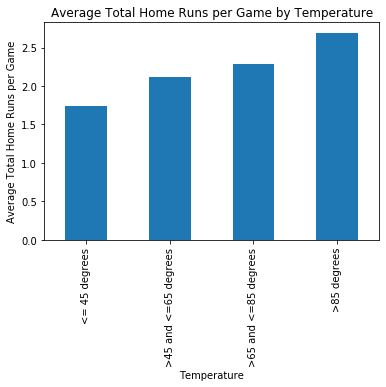

In [85]:
ax = temp_df.plot.bar(legend = False)
ax.set_xlabel("Temperature")
ax.set_ylabel("Average Total Home Runs per Game")
ax.set_title("Average Total Home Runs per Game by Temperature")

# How does weather type affect the total home runs scored per game?

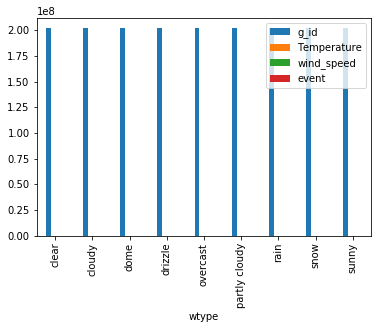

In [46]:
#Look at total home runs vs. weather type
wtype_group = final_df.groupby('wtype')
mean_hr_wtype = wtype_group.mean()
ax = mean_hr_wtype.plot.bar()


In [53]:
#Look at precipitation vs. total home runs
weather_label_group = final_df.groupby('Weather_Type_Label')
mean_hr_weatherlabel = weather_label_group.mean()
#mean_hr_weatherlabel.head(2).sort_values(by = 'event')
a = mean_hr_weatherlabel['event']

precip_df = a.to_frame()
precip_df.columns = ['Average Total Home Runs Scored per Game']
precip_df.index.names = ['Weather Type Label']
display(precip_df)

,Average Total Home Runs Scored per Game
Weather Type Label,
No precipitation,2.295863
Precipitation,2.394737


# How does wind speed affect the total home runs scored per game?

In [156]:
wind_label_group = final_df.groupby('wind_label')
mean_hr_windlabel = wind_label_group.mean()
mean_hr_windlabel.head(100).sort_values(by = 'event')

,g_id,Temperature,wind_speed,event
wind_label,,,,
>15 and <=20 mph,"201,800,991.72",68.94,17.17,2.03
>20 mph,"201,800,758.00",62.07,21.73,2.20
<= 5 mph,"201,801,273.20",73.60,2.05,2.25
>10 and <=15 mph,"201,801,071.82",71.13,12.67,2.28
>5 and <=10 mph,"201,801,275.59",75.10,7.88,2.38


# Are there more errors in different weather conditions?

In [59]:
#Isolate the error events
errorsdf = df[df['event'] == 'Field Error']
errorsdf.head(3)

,ab_id,batter_id,event,g_id,inning,o,p_score,p_throws,pitcher_id,stand,...,wind,delay,Temperature,wtype,wind_speed,wind_direction,total_runs,temp_label,Weather_Type_Label,wind_label
723,2018000724,458731,Field Error,201800010,1,0,0,L,457918,L,...,"0 mph, None",0,68,dome,0,None,7,>65 and <=85 degrees,No precipitation,<= 5 mph
782,2018000783,435522,Field Error,201800010,8,2,0,R,493200,L,...,"0 mph, None",0,68,dome,0,None,7,>65 and <=85 degrees,No precipitation,<= 5 mph
951,2018000952,452678,Field Error,201800013,1,1,0,R,593372,L,...,"9 mph, R to L",0,50,cloudy,9,R to L,13,>45 and <=65 degrees,No precipitation,>5 and <=10 mph


In [60]:
#Create a dataframe with just the game id and event
gamesnew_error = errorsdf[['g_id', 'event']]
gamesnew_error.head(3)

,g_id,event
723,201800010,Field Error
782,201800010,Field Error
951,201800013,Field Error


In [61]:
#Get count of errors by game
error_count = gamesnew_error.groupby('g_id').count()
error_count.head(3)

,event
g_id,
201800010,2
201800013,1
201800016,1


In [62]:
#Merge the 2 dataframes to create one with the gameid, game weather details, and total number of errors
final_error_df = pd.merge(newdf, error_count, on = 'g_id', how = 'outer')
final_error_df.head(5)

,g_id,Temperature,wind_speed,Weather_Type_Label,temp_label,wind_label,wtype,event
0,201800001,73,2,No precipitation,>65 and <=85 degrees,<= 5 mph,partly cloudy,NaN
1,201800001,73,2,No precipitation,>65 and <=85 degrees,<= 5 mph,partly cloudy,NaN
2,201800001,73,2,No precipitation,>65 and <=85 degrees,<= 5 mph,partly cloudy,NaN
3,201800001,73,2,No precipitation,>65 and <=85 degrees,<= 5 mph,partly cloudy,NaN
4,201800001,73,2,No precipitation,>65 and <=85 degrees,<= 5 mph,partly cloudy,NaN


In [63]:
#Table with game id, temperature, and number of errors (event)
#Remove duplicates in order to have one row of data for each game
final_error_df = final_error_df.drop_duplicates()
final_error_df = final_error_df.fillna(0)
final_error_df.head(10)

,g_id,Temperature,wind_speed,Weather_Type_Label,temp_label,wind_label,wtype,event
0,201800001,73,2,No precipitation,>65 and <=85 degrees,<= 5 mph,partly cloudy,0.0
94,201800002,72,0,No precipitation,>65 and <=85 degrees,<= 5 mph,dome,0.0
164,201800003,45,10,No precipitation,<= 45 degrees,>5 and <=10 mph,overcast,0.0
251,201800004,75,16,No precipitation,>65 and <=85 degrees,>15 and <=20 mph,partly cloudy,0.0
335,201800005,55,2,No precipitation,>45 and <=65 degrees,<= 5 mph,cloudy,0.0
399,201800006,82,0,No precipitation,>65 and <=85 degrees,<= 5 mph,clear,0.0
477,201800007,63,2,No precipitation,>45 and <=65 degrees,<= 5 mph,partly cloudy,0.0
548,201800008,69,6,No precipitation,>65 and <=85 degrees,>5 and <=10 mph,sunny,0.0
640,201800009,65,7,No precipitation,>45 and <=65 degrees,>5 and <=10 mph,partly cloudy,0.0
723,201800010,68,0,No precipitation,>65 and <=85 degrees,<= 5 mph,dome,2.0


# How does temperature affect the total errors per game?

In [75]:
#Look at total errors per game by temperature groupings
error_temp_label_group = final_error_df.groupby('temp_label')['event'].mean().sort_values()
error_temp = error_temp_label_group.to_frame()
error_temp.columns = ['Average Total Errors per Game']
error_temp.index.names = ['Temperature Label']
display(error_temp)


,Average Total Errors per Game
Temperature Label,
<= 45 degrees,0.600000
>85 degrees,0.615152
>65 and <=85 degrees,0.630380
>45 and <=65 degrees,0.744395


# How does weather type affect the total errors per game?

In [76]:
#Look at total errors versus weather type
error_wtype_label_group = final_error_df.groupby('wtype')
mean_error_wtype = error_wtype_label_group.mean()
mean_error_wtype.head(20).sort_values(by = 'event')


,g_id,Temperature,wind_speed,event
wtype,,,,
snow,2.018001e+08,27.000000,4.000000,0.000000
drizzle,2.018011e+08,63.000000,9.600000,0.466667
sunny,2.018012e+08,75.459144,8.396887,0.599222
overcast,2.018011e+08,64.437500,9.041667,0.611111
cloudy,2.018011e+08,68.880000,8.620000,0.644444
dome,2.018012e+08,72.769886,0.028409,0.653409
clear,2.018013e+08,76.970711,8.665272,0.654812
partly cloudy,2.018012e+08,75.650281,8.761236,0.669944
rain,2.018015e+08,68.318182,8.181818,0.772727


In [78]:
error_wtype_label_group = final_error_df.groupby('Weather_Type_Label')['event'].mean().sort_values()
error_wtype = error_wtype_label_group.to_frame()
error_wtype.columns = ['Average Total Errors per Game']
error_wtype.index.names = ['Weather Type Label']
display(error_wtype)


,Average Total Errors per Game
Weather Type Label,
Precipitation,0.631579
No precipitation,0.648558


# How does wind speed affect the total errors per game?

In [81]:
#WIND LABEL

# error_wind_label_group = final_error_df.groupby('wind_label')
# mean_error_windlabel = error_wind_label_group.mean()
# mean_error_windlabel.head().sort_values(by = 'event')

#Shows most errors when windiest

error_wind_label_group = final_error_df.groupby('wind_label')['event'].mean().sort_values()
error_wind = error_wind_label_group.to_frame()
error_wind.columns = ['Average Total Errors per Game']
error_wind.index.names = ['Wind Label']
display(error_wind)

,Average Total Errors per Game
Wind Label,
>5 and <=10 mph,0.617828
<= 5 mph,0.649398
>10 and <=15 mph,0.675789
>15 and <=20 mph,0.711111
>20 mph,1.133333


Text(0, 0.5, 'Avg Errors per Game')

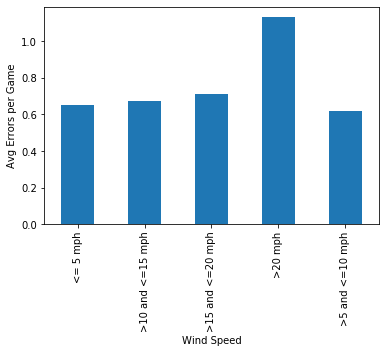

In [182]:
df_test = final_error_df.groupby(['wind_label'])['event'].mean()
ax = df_test.plot.bar()
ax.set_xlabel('Wind Speed')
ax.set_ylabel("Avg Errors per Game")
